# Predict Competitive ESports Outcomes

## Player Pairs Stats - Scaling Features

<b>Import libraries:</b>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

<b>Load data:</b>

In [14]:
data = pd.read_csv('../esports/data/player_pairs_avg_stats.csv')

<b>Dataset info:</b>

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1395 entries, 0 to 1394
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   match_id                       1395 non-null   int64  
 1   player                         1395 non-null   int64  
 2   player_deaths_per_min          1390 non-null   float64
 3   player_assists_per_min         1387 non-null   float64
 4   player_tower_damage            1395 non-null   int64  
 5   player_xp_per_min              1387 non-null   float64
 6   player_gold_per_min            1387 non-null   float64
 7   player_kills_per_min           1387 non-null   float64
 8   player_roshans_killed          1395 non-null   int64  
 9   player_obs_placed              1395 non-null   int64  
 10  opponent                       1395 non-null   int64  
 11  opponent_deaths_per_min        1395 non-null   float64
 12  opponent_assists_per_min       1395 non-null   f

<b>Check for null values:</b>

In [16]:
data.isna().sum()

match_id                         0
player                           0
player_deaths_per_min            5
player_assists_per_min           8
player_tower_damage              0
player_xp_per_min                8
player_gold_per_min              8
player_kills_per_min             8
player_roshans_killed            0
player_obs_placed                0
opponent                         0
opponent_deaths_per_min          0
opponent_assists_per_min         0
opponent_tower_damage            0
opponent_xp_per_min              0
opponent_gold_per_min            0
opponent_kills_per_min           0
opponent_roshans_killed          0
opponent_obs_placed              0
winner                           0
player_tower_damage_per_min      8
opponent_tower_damage_per_min    0
player_hero_damage_per_min       8
opponent_hero_damage_per_min     0
player_last_hits_per_min         8
opponent_last_hits_per_min       0
player_win_ratio                 0
opponent_win_ratio               0
dtype: int64

Drop roshans and obs columns (contains all zeroes):

In [17]:
data = data.drop(['player_roshans_killed','player_obs_placed','opponent_roshans_killed','opponent_obs_placed'], axis=1)

In [18]:
data.columns

Index(['match_id', 'player', 'player_deaths_per_min', 'player_assists_per_min',
       'player_tower_damage', 'player_xp_per_min', 'player_gold_per_min',
       'player_kills_per_min', 'opponent', 'opponent_deaths_per_min',
       'opponent_assists_per_min', 'opponent_tower_damage',
       'opponent_xp_per_min', 'opponent_gold_per_min',
       'opponent_kills_per_min', 'winner', 'player_tower_damage_per_min',
       'opponent_tower_damage_per_min', 'player_hero_damage_per_min',
       'opponent_hero_damage_per_min', 'player_last_hits_per_min',
       'opponent_last_hits_per_min', 'player_win_ratio', 'opponent_win_ratio'],
      dtype='object')

In [19]:
# Keep numeric columns for analysis
data_numeric = data.loc[:, ~data.columns.isin(['match_id', 'player','opponent','winner'])]

In [20]:
data_numeric.describe()

,player_deaths_per_min,player_assists_per_min,player_tower_damage,player_xp_per_min,player_gold_per_min,player_kills_per_min,opponent_deaths_per_min,opponent_assists_per_min,opponent_tower_damage,opponent_xp_per_min,opponent_gold_per_min,opponent_kills_per_min,player_tower_damage_per_min,opponent_tower_damage_per_min,player_hero_damage_per_min,opponent_hero_damage_per_min,player_last_hits_per_min,opponent_last_hits_per_min,player_win_ratio,opponent_win_ratio
count,1390.000000,1387.000000,1395.0,1387.000000,1387.000000,1387.000000,1395.000000,1395.000000,1395.0,1395.000000,1395.000000,1395.000000,1387.000000,1395.000000,1387.000000,1395.000000,1387.000000,1395.000000,1395.000000,1395.000000
mean,0.106305,0.214123,0.0,549.952305,424.813359,0.182131,0.113701,0.227553,0.0,558.921547,433.050825,0.185563,53.180234,56.398176,587.274486,605.259259,3.836238,3.977114,0.510546,0.511773
std,0.116628,0.205534,0.0,411.842157,280.522685,0.109780,0.114794,0.203585,0.0,382.856708,258.973462,0.103975,60.011433,60.344887,287.358365,260.405695,1.872882,1.751678,0.029198,0.029344
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.281250,0.409524
25%,0.000000,0.000000,0.0,0.000000,303.209615,0.128140,0.000000,0.000000,0.0,0.000000,346.281579,0.139899,0.000000,0.000000,478.966339,514.722039,2.587258,2.779962,0.498199,0.497535
50%,0.000000,0.273843,0.0,649.950000,482.450000,0.195192,0.135657,0.291264,0.0,655.650000,484.473684,0.198998,36.877637,42.614324,627.617392,635.361682,3.930835,4.021359,0.508820,0.508317
75%,0.209809,0.383717,0.0,783.650000,590.875000,0.256368,0.215593,0.384945,0.0,780.875000,580.725000,0.251449,88.787185,91.549483,767.993911,758.513634,5.169915,5.257631,0.523370,0.522131
max,0.479190,1.022480,0.0,1871.000000,1458.600000,0.584285,0.428806,0.940803,0.0,1724.500000,1265.315789,0.689345,354.094116,407.657587,1398.783705,1636.964535,9.356876,9.618261,0.682171,0.820755


### Plot numeric features (histogram, boxplot, qqplot)

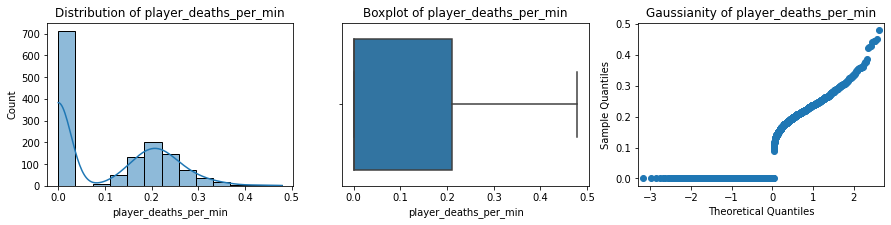

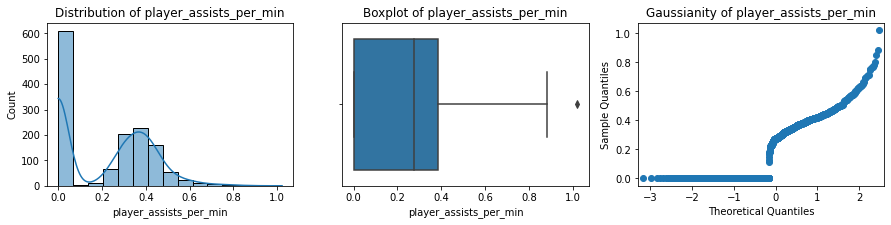

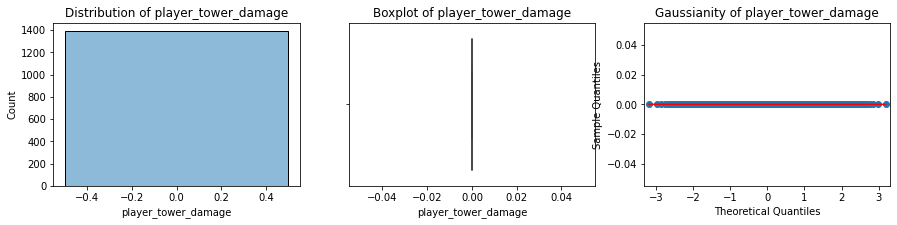

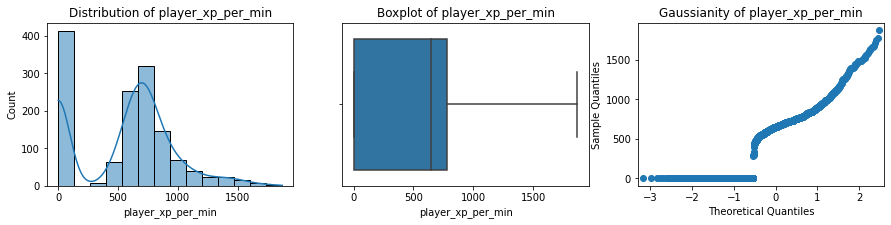

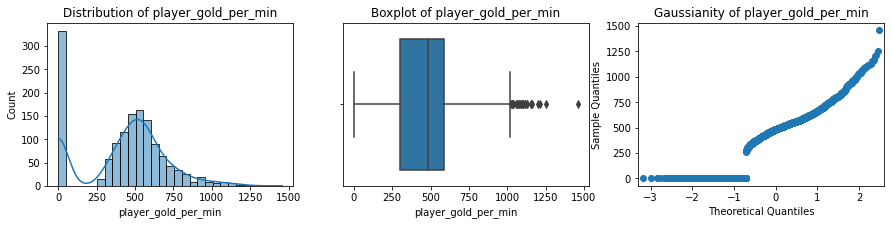

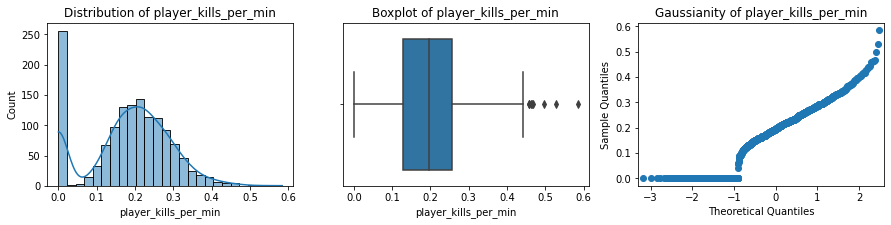

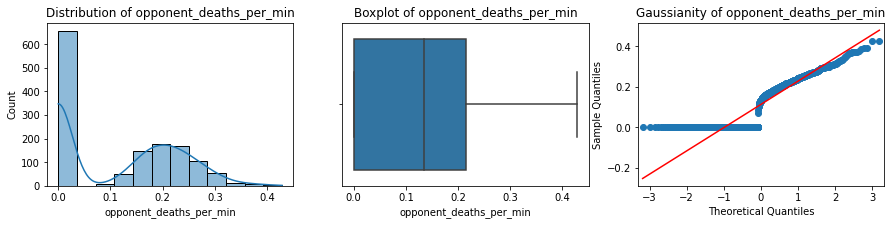

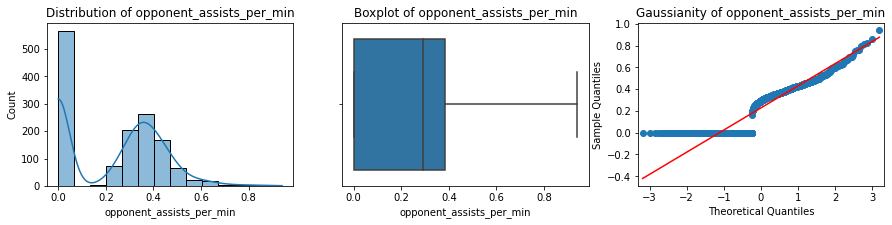

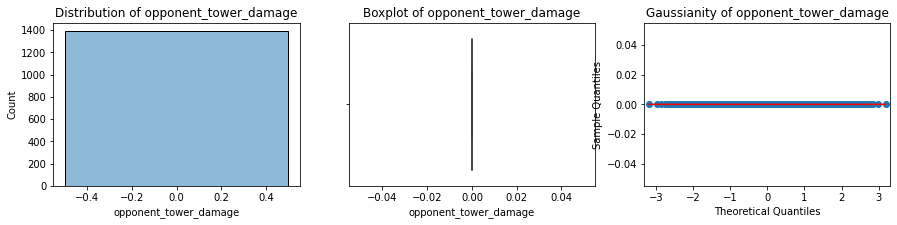

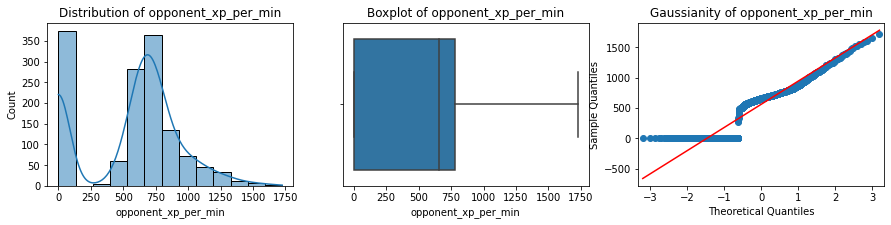

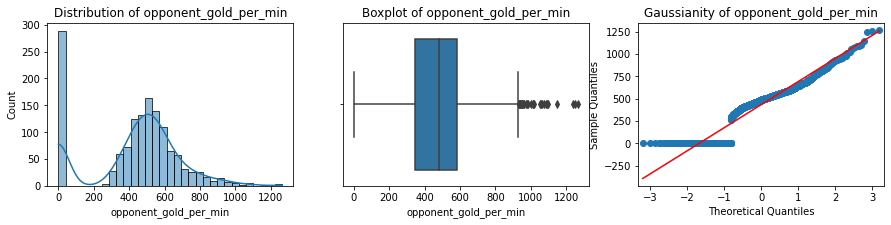

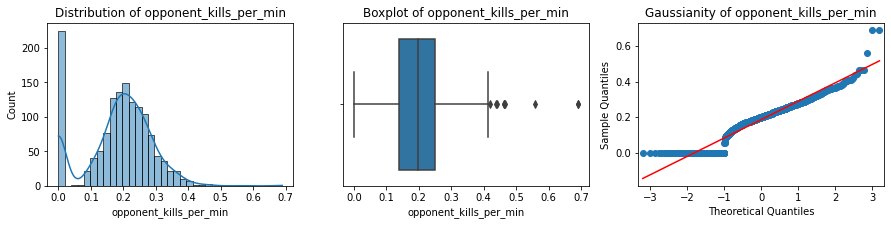

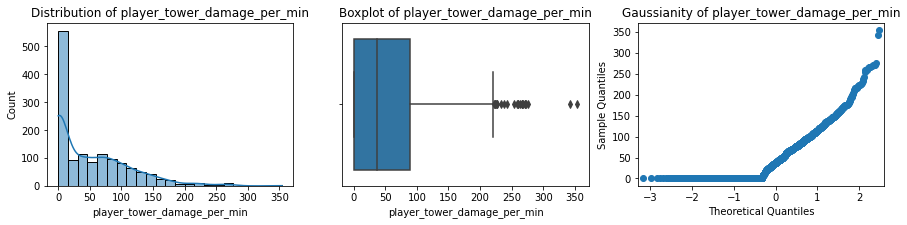

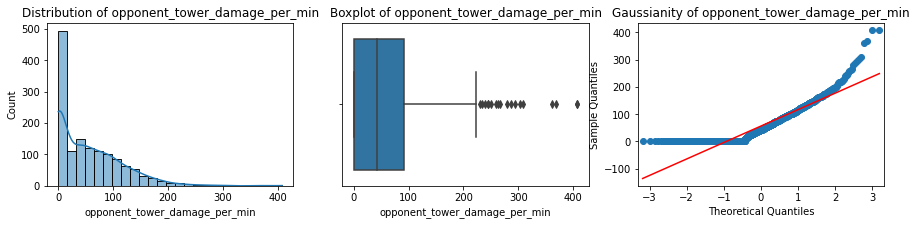

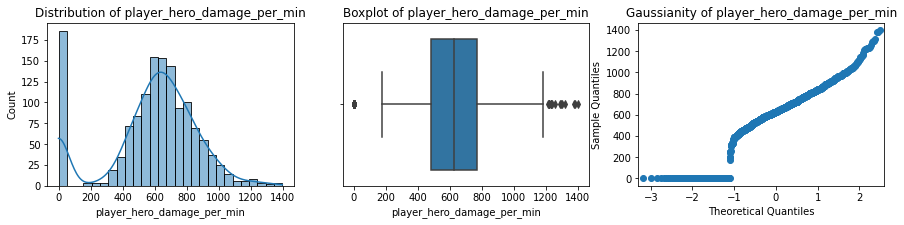

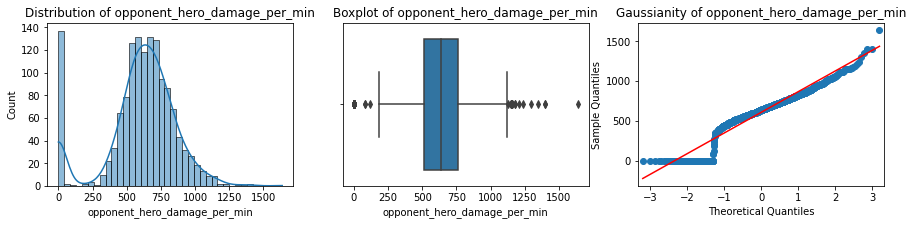

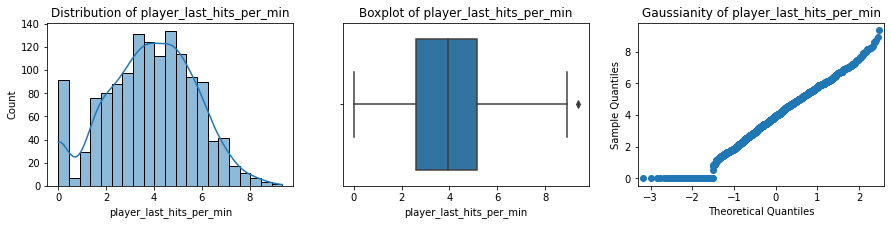

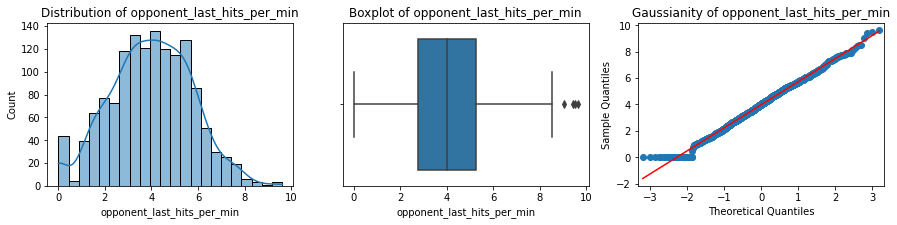

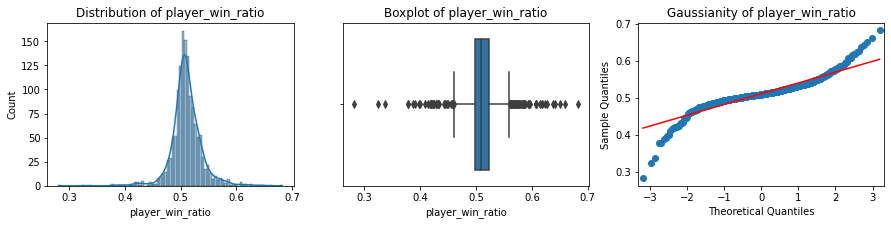

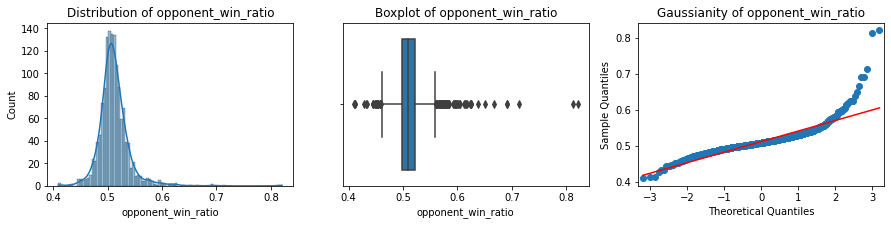

In [21]:
for feature in data_numeric.columns:
     # Three subplots per feature
    fig, ax =plt.subplots(1,3,figsize=(15,3))
    
    # Histogram - assess distribution of each feature
    ax[0].set_title(f"Distribution of {feature}")
    sns.histplot(data = data_numeric, x = feature, kde=True, ax = ax[0])
    
    # Boxplot - detect outliers
    ax[1].set_title(f"Boxplot of {feature}")
    sns.boxplot(data = data_numeric, x = feature, ax=ax[1])
    
    # qqplot - analyze if feature is normally distributed
    ax[2].set_title(f"Gaussianity of {feature}")
    qqplot(data_numeric[feature],line='s',ax=ax[2]);

Based on above, robust scaling will be applied to all features.